<a href="https://colab.research.google.com/github/ktoyesh04/Sparks-Data-Science-Internship/blob/main/ClassificationUsingDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kurapati Toyesh

# Sparks Internship Task - Prediction using Decision Tree Algorithm
- Create the Decision Tree classifier and visualize it graphically.
- The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
- Dataset: https://bit.ly/3kXTdox
- Sample Solution: https://bit.ly/2G6sYx9

### Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

### Data Loading

In [2]:
url = "https://bit.ly/3kXTdox"
df = pd.read_csv('Iris.csv', index_col=0)

# Exploratory Data Analysis

### Displaying the first few rows of the dataset

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Summary statistics of the dataset

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for missing values

In [5]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Extracting unique values of the target variable

In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Preprocessing

### Standardizing the target variable

In [7]:
df['Species'] = df['Species'].apply(lambda x: x.split('-')[-1].title())

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Setosa
2,4.9,3.0,1.4,0.2,Setosa
3,4.7,3.2,1.3,0.2,Setosa
4,4.6,3.1,1.5,0.2,Setosa
5,5.0,3.6,1.4,0.2,Setosa


### Separating features and target variable

In [9]:
y = df['Species']
X = df.drop('Species', axis=1)

# Model Training

### Splitting the dataset into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Initializing and fitting the decision tree classifier

In [11]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### Evaluating the performance of the model on the test set

In [12]:
y_pred = dtree.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9473684210526315
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.87      1.00      0.93        13
   Virginica       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38



### Performing 5-fold cross-validation to assess model performance

In [13]:
cv_scores = cross_val_score(dtree, X, y, cv=5)  # 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean accuracy: 0.96


### Plotting the decision tree

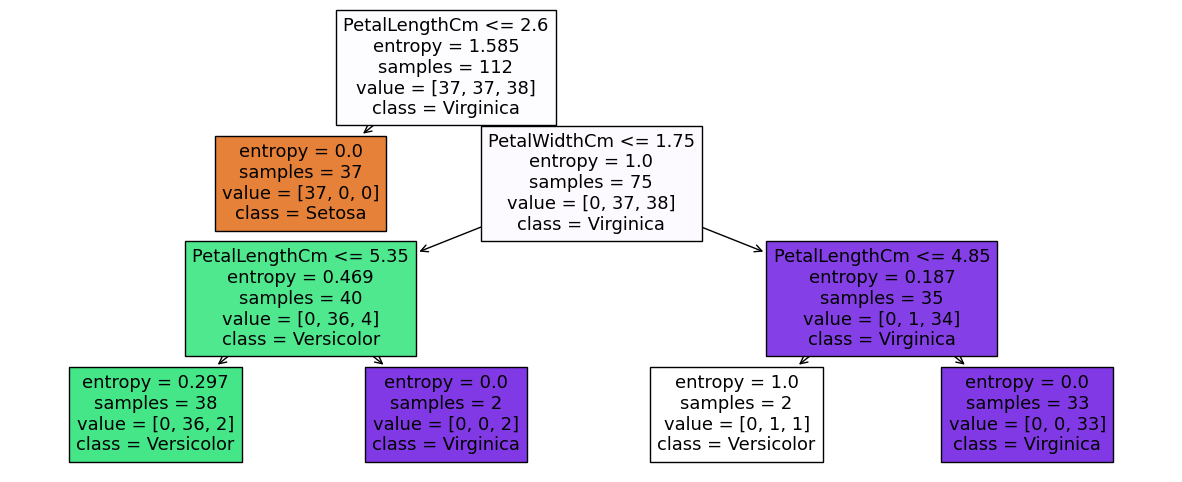

In [15]:
plt.figure(figsize=(15, 6))
a = plot_tree(dtree, filled=True, feature_names=list(X.columns), class_names=list(y.unique()))